In [1]:
# 10장 회귀분석 'Regression Analyis'

# 10.5 Scikit learn을 이용한 회귀분석

In [2]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


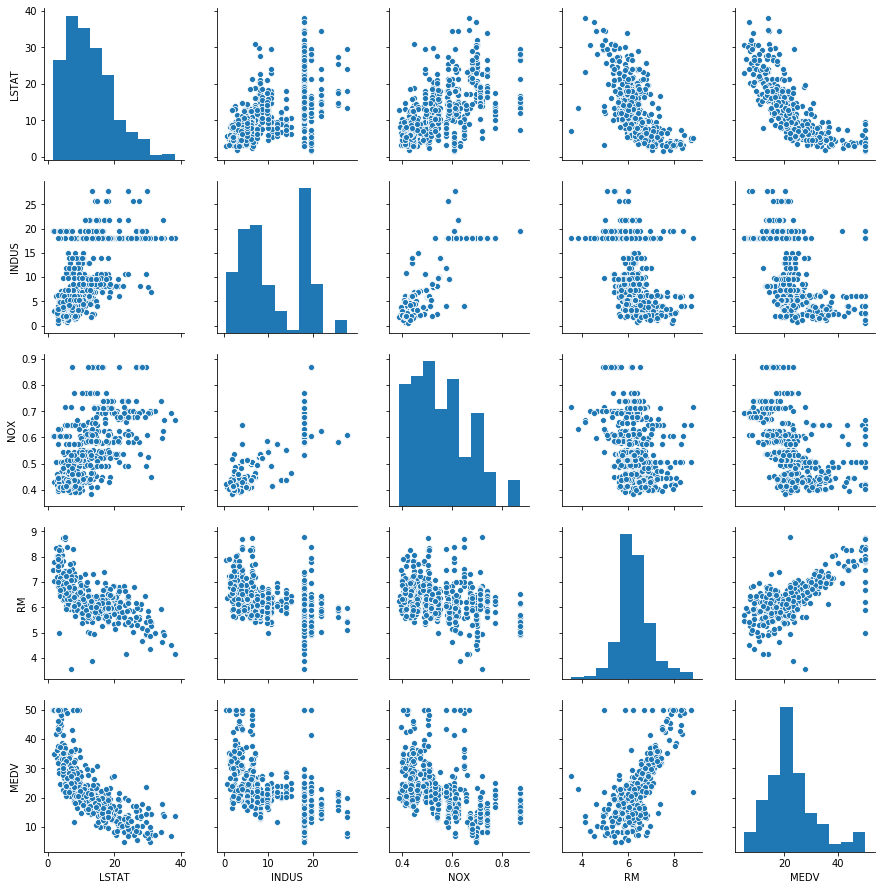

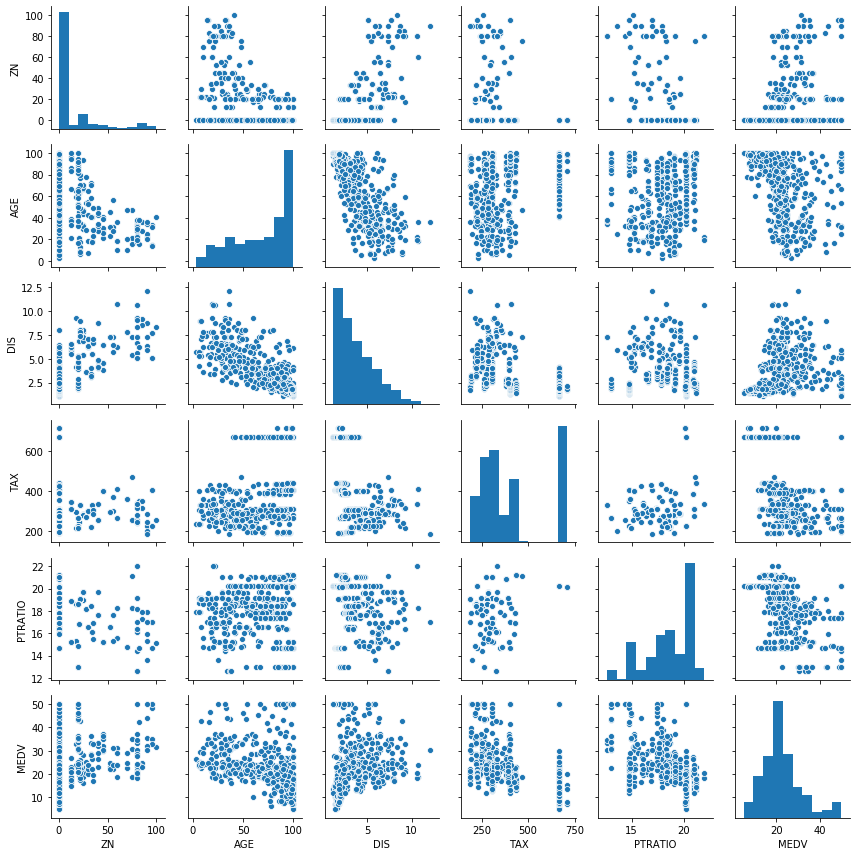

In [5]:
#종속변수 MEDV(집가격)와 설명변수의 Plot 그리기.
import matplotlib.pyplot as plt
import seaborn as sns
col1 = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
col2 = ['ZN', 'AGE', 'DIS', 'TAX','PTRATIO', 'MEDV']
sns.pairplot(house[col1], size=2.5)
sns.pairplot(house[col2], size=2.0)
plt.tight_layout()
plt.show()

In [6]:
#종속변수 MEDV(집가격)와 설명변수의 상관계수 행렬 구하기
import numpy as np
cm1 = np.corrcoef(house[col1].values.T)
cm2 = np.corrcoef(house[col2].values.T)
print(cm1)
print(cm2)

[[ 1.          0.60379972  0.59087892 -0.61380827 -0.73766273]
 [ 0.60379972  1.          0.76365145 -0.39167585 -0.48372516]
 [ 0.59087892  0.76365145  1.         -0.30218819 -0.42732077]
 [-0.61380827 -0.39167585 -0.30218819  1.          0.69535995]
 [-0.73766273 -0.48372516 -0.42732077  0.69535995  1.        ]]
[[ 1.         -0.56953734  0.66440822 -0.31456332 -0.39167855  0.36044534]
 [-0.56953734  1.         -0.74788054  0.50645559  0.26151501 -0.37695457]
 [ 0.66440822 -0.74788054  1.         -0.53443158 -0.23247054  0.24992873]
 [-0.31456332  0.50645559 -0.53443158  1.          0.46085304 -0.46853593]
 [-0.39167855  0.26151501 -0.23247054  0.46085304  1.         -0.50778669]
 [ 0.36044534 -0.37695457  0.24992873 -0.46853593 -0.50778669  1.        ]]


In [7]:
#일부 변수에 대한 log 변환
import numpy as np
house['LLSTAT']=np.log(house['LSTAT'])
house['LINDUS']=np.log(house['INDUS'])
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LLSTAT,LINDUS
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1.605430,0.837248
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,2.212660,1.955860
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1.393766,1.955860
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1.078410,0.779325
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1.673351,0.779325


In [8]:
#전체 data를 종속변수 y와 특성변수 X의 data로 나누기
y = house['MEDV'].values
house1=house.drop(['LSTAT','INDUS','MEDV'],axis=1)
X = house1.values

In [9]:
#전체 data를 traning data(70%)와 test data(30%)로 나누기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
#regression module 불러오기와 모형추정
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#추정값 확인
print('Slope:' ,mlr.coef_)
print('Intercept:' ,mlr.intercept_)

Slope: [-1.36676828e-01  3.13177997e-02  2.52393199e+00 -1.70295629e+01
  1.23977704e+00  3.06818458e-02 -1.28840466e+00  2.61968148e-01
 -6.58141653e-03 -8.27862485e-01  4.90558897e-03 -9.97211822e+00
 -6.04522425e-01]
Intercept: 65.69779117501646


In [12]:
#예측치 구하기
y_train_pred=mlr.predict(X_train)
y_test_pred=mlr.predict(X_test)

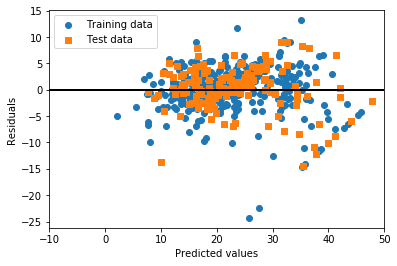

In [13]:
#잔차에 대한 plot그리기.
plt.scatter(y_train_pred, y_train_pred - y_train,marker='o',label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [14]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

MSE train: 18.139, test: 17.416


In [15]:
# 모형의 R^2
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.777, test: 0.810


In [16]:
############## 로버스트 회귀 'RANSAC Regressor'
from sklearn.linear_model import RANSACRegressor  #RANSAC module import
rans = RANSACRegressor(max_trials=100,min_samples=45,loss='absolute_loss',residual_threshold=5.0, random_state=1)
rans.fit(X_train,y_train)
y_train_pred=rans.predict(X_train)
y_test_pred=rans.predict(X_test)


In [17]:
# 모형의 MSE traning set
mean_squared_error(y_train, y_train_pred)

26.959180677416235

In [16]:
# 모형의 MSE test set
mean_squared_error(y_test, y_test_pred)

22.296199901347748

In [17]:
# RANSAC에서 회귀 계수를 추정하는데 사용한데이터(inner)와 특이치(outlier)출력
inlier_mask=rans.inlier_mask_
print('inner',inlier_mask)

inner [ True  True False  True False  True  True  True False False  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True False  True False  True False False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
  True False False  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  T

In [18]:
outlier_mask=np.logical_not(inlier_mask)
print('outlier',outlier_mask)

outlier [False False  True False  True False False False  True  True False False
 False False False False False False False  True False False False False
 False False  True False False False False False False False False  True
 False False False False False False  True False  True False  True  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False  True False
 False  True  True False False False False  True False False False False
 False False False False False False False False False  True False False
 False False  True False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False False False False False  True False False False False  True False
 False False False False False False False 

In [17]:
###########SVR.Regression.....
from sklearn.svm import SVR  #SVR module import
svl=SVR(kernel='linear', C=1.0,epsilon=0.1)      #선형 SVM회귀
svr=SVR(kernel='rbf', C=1.0,epsilon=0.1)      #비선형 SVM회귀
svl.fit(X_train,y_train)   #선형 SVM model fitting
svr.fit(X_train,y_train)   #비선형 SVM model fitting

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_train_predsvl=svl.predict(X_train)   #선형 SVM traing set의 예측치 구하기
y_train_predsvr=svr.predict(X_train)   #비선형 SVM traing set의 예측치 구하기
y_test_predsvl=svl.predict(X_test)   #선형 SVM test set의 예측치 구하기
y_test_predsvr=svr.predict(X_test)   #비선형 SVM test set의 예측치 구하기

In [19]:
svlscore=svl.score(X_train,y_train)   #선형 R^2 
print(svlscore)
svrscore=svr.score(X_train,y_train)      #비선형 에서 R^2는 의미 없음.
print(svrscore)

0.7257056445901271
0.15146834339313023


In [20]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
mse_n_train=mean_squared_error(y_train, y_train_predsvr)
mse_n_test=mean_squared_error(y_test, y_test_predsvr)
print(mse_l_train,mse_l_test,mse_n_train,mse_n_test)

22.269701769971398 16.382339448697692 68.89149033627767 92.0155406527536


In [35]:
# 모형의 R^2
from sklearn.metrics import r2_score
R2_l=r2_score(y_train, y_train_predsvl)
R2_n=r2_score(y_train, y_train_predsvr)
print(R2_l,R2_n)

0.7257056445901271 0.1514683433931302
